In [0]:
import os
import zipfile
import random
import numpy as np

In [2]:
!wget --no-check-certificate \
    "https://storage.googleapis.com/datsets/DRIVE.zip"\
    -O "/tmp/DRIVE.zip"

local_zip = '/tmp/DRIVE.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


--2020-04-10 16:01:23--  https://storage.googleapis.com/datsets/DRIVE.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29756930 (28M) [application/x-zip-compressed]
Saving to: ‘/tmp/DRIVE.zip’

/tmp/DRIVE.zip      100%[===================>]  28.38M  72.3MB/s    in 0.4s    

2020-04-10 16:01:24 (72.3 MB/s) - ‘/tmp/DRIVE.zip’ saved [29756930/29756930]



In [3]:
import subprocess,sys
!wget --no-check-certificate \
    "https://storage.googleapis.com/datsets/model1/9%20by%209/patches9n9nskip2.zip"\
    -O "/tmp/patches.zip"

zipFile = '/tmp/patches.zip'
destinationDirectory='/tmp'
subprocess.Popen(["7z", "e", f"{zipFile}", f"-o{destinationDirectory}", "-y"])
# zip_ref   = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/tmp')
# zip_ref.close()


--2020-04-10 16:01:26--  https://storage.googleapis.com/datsets/model1/9%20by%209/patches9n9nskip2.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72745748 (69M) [application/x-zip-compressed]
Saving to: ‘/tmp/patches.zip’

/tmp/patches.zip    100%[===================>]  69.38M   194MB/s    in 0.4s    

2020-04-10 16:01:27 (194 MB/s) - ‘/tmp/patches.zip’ saved [72745748/72745748]



In [0]:
X = np.load('/tmp/patches9n9nskip2.npy')

In [6]:
X.shape

(1652720, 9, 9, 3)

In [7]:
#Make sure to upload outputs.npy file before running the cell
y=np.load('/content/outputs.npy')
w=y//255
z=set(w)
y=w
y.shape

(1652720,)

In [0]:
X_train,X_val,y_train,y_val=X[0:1500000,:,:],X[1500000:1652720,:,:],y[0:1500000],y[1500000:1652720]

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3, 3), activation='relu', input_shape=(9,9,3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(X_train,y_train,batch_size=64,epochs=10,validation_data=(X_val,y_val))
model.save('model1st9by9.hdf5')

Epoch 1/10
23438/23438 [==============================] - 63s 3ms/step - loss: 0.1348 - accuracy: 0.9544 - val_loss: 0.1142 - val_accuracy: 0.9607
Epoch 2/10
23438/23438 [==============================] - 62s 3ms/step - loss: 0.1194 - accuracy: 0.9576 - val_loss: 0.1067 - val_accuracy: 0.9610
Epoch 3/10
23438/23438 [==============================] - 62s 3ms/step - loss: 0.1169 - accuracy: 0.9583 - val_loss: 0.1022 - val_accuracy: 0.9613
Epoch 4/10
23438/23438 [==============================] - 62s 3ms/step - loss: 0.1146 - accuracy: 0.9588 - val_loss: 0.1065 - val_accuracy: 0.9618
Epoch 5/10
23438/23438 [==============================] - 62s 3ms/step - loss: 0.1140 - accuracy: 0.9590 - val_loss: 0.1074 - val_accuracy: 0.9607
Epoch 6/10
23438/23438 [==============================] - 63s 3ms/step - loss: 0.1137 - accuracy: 0.9591 - val_loss: 0.1099 - val_accuracy: 0.9587
Epoch 7/10
23438/23438 [==============================] - 62s 3ms/step - loss: 0.1137 - accuracy: 0.9591 - val_loss: 0

In [ ]:
tfmodel.load_

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 7, 7, 32)          896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 288)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              295936    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 822,145
Trainable params: 822,145
Non-trainable params: 0
__________________________________________________

In [1]:
plt.imsave(tf.keras.utils.plot_model(model, 'multi_input_and_output_model.png', show_shapes=True))

NameError: name 'plt' is not defined

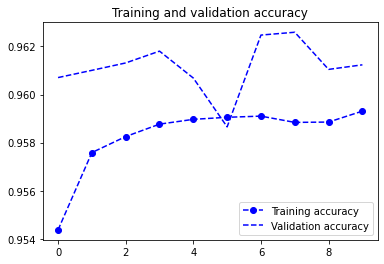

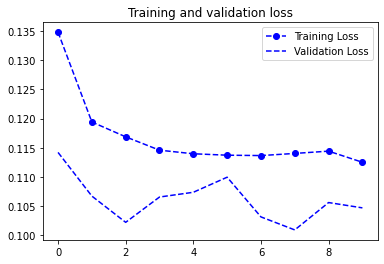

In [14]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy',linestyle='dashed')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy',linestyle='dashed')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss',linestyle='dashed')
plt.plot(epochs, val_loss, 'b', label='Validation Loss',linestyle='dashed')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
import pandas as pd
df = pd.DataFrame(history.history)

In [16]:
df

,loss,accuracy,val_loss,val_accuracy
0,0.134794,0.954369,0.114191,0.960706
1,0.119408,0.957586,0.106704,0.961007
2,0.116864,0.958252,0.102206,0.961315
3,0.114574,0.958769,0.106542,0.961806
4,0.113961,0.958969,0.107358,0.960686
5,0.113715,0.959054,0.109942,0.958656
6,0.113651,0.959103,0.103135,0.962474
7,0.114018,0.958842,0.100905,0.962592
8,0.114411,0.958855,0.105597,0.961046
9,0.112502,0.959311,0.104684,0.961236


In [0]:
df.to_excel('model1st9by9_history.xlsx')